In [54]:
#importing libraries
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
!pip install tensor-dash

In [55]:
#generate your dataset
def generate_data(location:str,sample_number=10):
  data=pd.read_csv(location,engine='python')
  head=data.head()
  tail=data.tail()
  sample=data.sample(sample_number)
  description=data.describe()
  columns=data.columns
  info=data.info()
  shape=data.shape
  size=data.size
  return_data = {'data':data,'head':head,'tail':tail,'sample':sample,'description':description,'columns':columns,'info':info,
          'shape':shape,'size':size}
  return return_data

In [56]:
data_set=generate_data('/content/mushrooms.csv')
data=data_set['data']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [57]:
def get_type(data):
  numeric=[]
  categorical=[]
  for col in data.columns:
    if data[f'{col}'].dtypes == 'object':
      categorical.append(col)
    else:
      numeric.append(col)
  return {'numeric':numeric,'categorical':categorical}

In [58]:
# check for null values and deal with them
# this function will take the type of process as well for both numeric and categorical data
def treat_null_values(data,numeric_type:str='mean'):
  types=get_type(data)
  numeric=types['numeric']
  categorical=types['categorical']
  if numeric_type == 'mean':
    for col in numeric:
      data[f'{col}']=data[f'{col}'].fillna(data[f'{col}'].mean())
  elif numeric_type == 'mode':
    for col in numeric:
      data[f'{col}']=data[f'{col}'].fillna(data[f'{col}'].mode())
  elif numeric_type == 'median':
    for col in numeric:
      data[f'{col}']=data[f'{col}'].fillna(data[f'{col}'].median())
  elif numeric_type == 'frequent':
    for col in numeric:
      data[f'{col}']=data[f'{col}'].fillna(data[f'{col}'].nunique[0])
  elif numeric_type == 'drop':
    for col in numeric:
      data[f'{col}']=data[f'{col}'].dropnna(inplace=True)
  elif numeric_type == 'predictive_modeling':
    pass # create a seprate function for this
  elif numeric_type == 'impute':
    pass # create a seprate function for this as well
  
  for col in categorical:
    most_frequent_category=data[f'{col}'].mode()[0]
    data[f'{col}'].fillna(most_frequent_category,inplace=True)
  return data

  

def predictive_modeling():
  pass #do a detailed study as disadvantages for this model usually outweights advantages
def multiple_imputation():
  from fancyimpute import IterativeImputer as MICE
  data= pd.DataFrame(MICE().fit_transform(data))
  return data

In [59]:
def encode_data(data,multiclass:str='One_hot',binary_class:str='Label'): #this function takes three args one is the data 2nd is the type of encoding for multiclass data and third is the encoding for binary class data
  categorical=get_type(data)['categorical']
  multivariate=[]
  bivariate=[]
  for col in categorical:
    if data[f'{col}'].nunique()>2:
      multivariate.append(col)
    else:
      bivariate.append(col)
  
  if multiclass == 'One_hot':
    for col in multivariate:
      data=encode_and_bind(data,col)
  if binary_class == 'Label':
    for col in bivariate:
      data=label_encode(data,col)
  # add other sorting techniques as well in here
  return data

def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res.pop(feature_to_encode)
    return(res)

def label_encode(data,col):
  from sklearn.preprocessing import LabelEncoder
  encoder=LabelEncoder()
  data[col]=encoder.fit_transform(data[col])
  return data
  
# this function needs to be modified therefore add differenr sort of encoding techniques as well in this cll

In [60]:
def treat_outliers(data,feature:str,algo:str='IQR',z_threshold:int=3,add_feature=None,remove:bool=False,scatter:bool=False,feature_x=None,feature_y=None): # this function takes two arguments one is data and 2ns is the algorithm
  pass
  if scatter == True:
    px.scatter(data_px,x=feature_x,y=feature_y,hover_name='Country')
  else:
    if algo == 'IQR':
      outlier_index=Inter_quantile_range(data,feature)
    if algo == 'EEA': # elliptic envelope algo
      outlier_index=Elliptice_envelope_algo(data,feature,add_feature)
    if algo == 'ISF': # Isolate forest algo
      outlier_index=Isolate_forest_algo(data,feature)
    if algo == 'One_classSVM': # one class svm
      outlier_index=One_class_SVM(data,feature)
    if algo == 'LOF':
      outlier_index=Local_factor_outlier(data,feature)
    if algo == 'Z_score':
      outlier_index=Z_score_algo(data,feature,z_threshold)
    print(outlier_index)
    if remove == True:
      data=remove_outliers(outlier_index,data)
    
    return data
    


# in all these function display the index of outliers

def Local_factor_outlier(data,feature):
  import numpy as np 
  from sklearn.neighbors import LocalOutlierFactor
  X=data[[feature,data.columns.values[-1]]]
  lof = LocalOutlierFactor(n_neighbors=20, algorithm='auto',
                         metric='minkowski', contamination=0.04,
                         novelty=False, n_jobs=-1)
  pred = lof.fit_predict(X)
  outlier_index = np.where(pred==-1)
  return outlier_index

def One_class_SVM(data,feature): #this returns novelty I am guessing so fuck this method
  import numpy as np
  from sklearn.svm import OneClassSVM
  X=data[[feature,data.columns.values[-1]]]
  one_class_svm = OneClassSVM(kernel='rbf', degree=3, gamma='scale')
  new_data = np.array([[-4, 8.5]])# change these values as per your dataset
  one_class_svm.fit(X)
  pred = one_class_svm.predict(new_data)
  outlier_index = np.where(pred==-1)
  return outlier_index

def Isolate_forest_algo(data,feature):
  import numpy as np
  from sklearn.ensemble import IsolationForest
  from sklearn.decomposition import PCA
  from sklearn.preprocessing import StandardScaler
  X=data[[feature,data.columns.values[-1]]]
   # Returns 1 of inliers, -1 for outliers
  iforest = IsolationForest(n_estimators=100, max_samples='auto', 
                          contamination=0.05, max_features=1.0, 
                          bootstrap=False, n_jobs=-1, random_state=1)
  pred = iforest.fit_predict(X)
 # Extract outliers
  outlier_index = np.where(pred==-1)
  return outlier_index

def Elliptice_envelope_algo(data,feature,add_feature):
  import numpy as np
  from sklearn.covariance import EllipticEnvelope
  elpenv = EllipticEnvelope(contamination=0.025, 
                          random_state=1)
  X=data[[feature,add_feature]]
# Returns 1 of inliers, -1 for outliers
  pred = elpenv.fit_predict(X)

# Extract outliers
  outlier_index = np.where(pred==-1)
  return outlier_index

def Inter_quantile_range(data,feature):
  Q1 = np.percentile(data[f'{feature}'], 25, interpolation = 'midpoint') 
  Q2 = np.percentile(data[f'{feature}'], 50, interpolation = 'midpoint') 
  Q3 = np.percentile(data[f'{feature}'], 75, interpolation = 'midpoint') 
  IQR = Q3 - Q1 
  low_lim = Q1 - 1.5 * IQR
  up_lim = Q3 + 1.5 * IQR
  outlier_index=[]
  for val in data[f'{feature}']:
    if val > up_lim or val <low_lim:
      outlier_index.append(data.index[data[f'{feature}'] == val].values[0])
  return outlier_index
         
def Z_score_algo(data,feature,z_threshold):
  mean = np.mean(data[f'{feature}'])
  std = np.std(data[f'{feature}'])
  print('mean of the dataset is', mean)
  print('std. deviation is', std)
  outlier_index = []
  for val in data[f'{feature}']:
    z = (val-mean)/std
    if z > z_threshold:
      outlier_index.append(data.index[data[f'{feature}'] == val].values[0])
  return outlier_index
  


# this function will remove the outliers if removal is allowed
def remove_outliers(index,data):
  for row in index:
    data.drop([row])
    print(f'dropped value at index {row}')
  return data

      

# if remove is true remove outliers else if it is false just return the index of outliers
# this will function will be returning two datasets the original one and one in which all the outliers are removed



In [67]:
# this function will perform all the data preprocessing steps
# incase you want to use non default algos call these function seprately
def preprocess_data(data,feature:str):
  data=treat_null_values(data)
  data=encode_data(data)
  last_column = data[feature]
  data.drop(feature, inplace=True, axis=1)
  data.insert(data.shape[1],feature,last_column)
  
  return data

# call outliers and balance function independentlu whenever you like and PS Fuck Roopa


In [68]:
#You can further preprocess the data you want in this code cell like removing some values and handle some corner cases
#problem arising here is that the last column is getting modified as well into one hot encoding 
#modifying the funciton
data=preprocess_data(data,'class')

In [69]:
display(data)

,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,veil-type,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,...,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,class
0,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,0,1,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
8120,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
8121,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
8122,0,1,0,1,1,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1


In [70]:
def split_and_scale(x,y,scale:str="standardize",split_precent:int=0.2):
  from sklearn.model_selection import train_test_split
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=split_precent,random_state=42)
  if scale == 'standardize':
    res=standardize(x_train,x_test)
    return {'x_train':res['x_train'],'x_test':res['x_test'],'y_train':y_train,'y_test':y_test,'scaler':res['scaler']}
  else:
    res=normalize(x_train,x_test)
    return {'x_train':res['x_train'],'x_test':res['x_test'],'y_train':y_train,'y_test':y_test,'scaler':res['scaler']}

def standardize(x_train,x_test):
  from sklearn.preprocessing import StandardScaler
  st=StandardScaler()
  x_train=st.fit_transform(x_train)
  x_test=st.transform(x_test)
  return {'x_train':x_train,'x_test':x_test,'scaler':st}


def normalize(x_train,x_test):
  from sklearn.preprocessing import normalize
  nm=normalize()
  x_train=nm.fit_transform(x_train)
  x_test=nm.transform(x_test)
  return {'x_train':x_train,'x_test':x_test,'scaler':nm}


In [71]:
x=data.iloc[:,:-1].values #these are the independent variables
y=data.iloc[:,-1].values #these are the dependent variables

In [72]:
final_Data=split_and_scale(x,y)

In [73]:
scalerObj=final_Data['scaler']
x_train=final_Data['x_train']
x_test=final_Data['x_test']
y_train=final_Data['y_train']
y_test=final_Data['y_test']

In [74]:
!pip install tensor-dash

In [78]:
#modify this function to take kwargs and then use the key value pair
def create_initializeModel(layers:list): #this list will contain three parametres number of layers,neurons in each layer,and the activation function
  #initializing the ANN
  ann=tf.keras.models.Sequential()
  #adding the layers
  for layer in layers:
    ann.add(tf.keras.layers.Dense(units=layer['neurons'],activation=layer['activation']))
  return ann

#since this is a multiclass classification therfore the activation funciton in the output layer will be softmax
ann=create_initializeModel([{"neurons":6,'activation':'relu'},{"neurons":6,'activation':'relu'},{"neurons":1,'activation':'sigmoid'}])
#need to upgrade this function for cetain options

In [79]:
#need to update this function for certain options
def compileModel(model,optimizer:str='adam',loss:str='binary_crossentropy',metrics:list=['accuracy']):
  ann.compile(optimizer=optimizer,loss=loss,metrics=metrics)
  return ann
 
ann=compileModel(ann,loss='binary_crossentropy')

In [80]:
from tensordash.tensordash import Tensordash
histories=Tensordash(
    ModelName='ann Clasification (mushroom classification model)',
    email='dumkaabhipray@gmail.com',
    password='kamalanita1@')
def trainModel(ann,x_train,y_train,batchSize:int=32,epochs:int=100):
  try:
    ann.fit(x_train,y_train,batch_size=batchSize,epochs=epochs,callbacks=[histories])
    return ann
  except Exception as e:
    print(e)
    histories.sendCrash()

ann=trainModel(ann,x_train,y_train)

Epoch 1/100
204/204 [==============================] - 2s 5ms/step - loss: 0.4271 - accuracy: 0.8344
Epoch 2/100
204/204 [==============================] - 2s 9ms/step - loss: 0.1039 - accuracy: 0.9849
Epoch 3/100
204/204 [==============================] - 1s 5ms/step - loss: 0.0374 - accuracy: 0.9966
Epoch 4/100
204/204 [==============================] - 2s 9ms/step - loss: 0.0134 - accuracy: 0.9998
Epoch 5/100
204/204 [==============================] - 2s 9ms/step - loss: 0.0060 - accuracy: 1.0000
Epoch 6/100
204/204 [==============================] - 1s 5ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 7/100
204/204 [==============================] - 1s 5ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 8/100
204/204 [==============================] - 1s 5ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 9/100
204/204 [==============================] - 1s 5ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 10/100
204/204 [==============================] - 1s 5ms/step - loss: 0.0010 - accura

[[0 0]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 1]]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


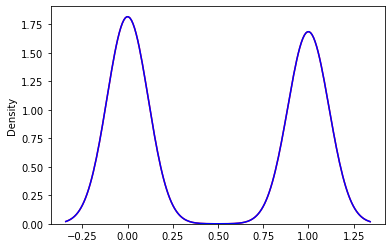

In [81]:
def predictResults(ann,x_test,y_train):
  #predicting test set results
  y_pred=ann.predict(x_test)#this will simply return probablity
  y_pred=(y_pred>0.5)#we need to convert probablity to some solid value based on some threshold value
  res=np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
  print(res)
  ax1=sns.distplot(y_test,hist=False,color="r",label="actual value")
  sns.distplot(y_pred,hist=False,color="b",label="predicted values",ax=ax1)
predictResults(ann,x_test,y_train)

In [ ]:
def crossValidateModel(ann,x_train,y_train,batchSize:int=32,epoch:int=100):
  accuracies=[]
  for val in range(1,10):
    print(f'this is the {val}th dataset split results')
    histories_validate=Tensordash(
    ModelName=f'ann Clasification (mushroom classification) {val}th dataset split',
    email='dumkaabhipray@gmail.com',
    password='kamalanita1@')
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=val+7)
    try:
      history=ann.fit(np.asarray(x_train).astype(np.float32), np.asarray(y_train).astype(np.float32),batch_size=batchSize,epochs=epoch,callbacks=[histories_validate])
      accuracies.append(history)
    except Exception as e:
      print(f'model crashed for {val}th iteration')
      print(e)
      histories_validate.sendCrash()
  return accuracies

accuracies=crossValidateModel(ann,x_train,y_train)
  

this is the 1th dataset split results
Epoch 1/100
191/191 [==============================] - 2s 13ms/step - loss: 5.9919e-05 - accuracy: 1.0000
Epoch 2/100
191/191 [==============================] - 2s 10ms/step - loss: 4.8530e-05 - accuracy: 1.0000
Epoch 3/100
191/191 [==============================] - 2s 10ms/step - loss: 3.8393e-05 - accuracy: 1.0000
Epoch 4/100
191/191 [==============================] - 2s 10ms/step - loss: 3.0343e-05 - accuracy: 1.0000
Epoch 5/100
191/191 [==============================] - 2s 10ms/step - loss: 2.5173e-05 - accuracy: 1.0000
Epoch 6/100
191/191 [==============================] - 1s 6ms/step - loss: 2.1311e-05 - accuracy: 1.0000
Epoch 7/100
191/191 [==============================] - 1s 6ms/step - loss: 1.8474e-05 - accuracy: 1.0000
Epoch 8/100
191/191 [==============================] - 2s 10ms/step - loss: 1.5966e-05 - accuracy: 1.0000
Epoch 9/100
191/191 [==============================] - 1s 6ms/step - loss: 1.3929e-05 - accuracy: 1.0000
Epoch 10/10

In [ ]:
#display the results in  here
#modify this function to be dynamic
def createDataFrames():
  accuracy_Data=[]
  loss_Data=[]
  for history in accuracies:
    accuracy_arr=[]
    accuracy_arr.append(sum(history.history['accuracy']) / len(history.history['accuracy']))
    loss_arr=[]
    loss_arr.append(sum(history.history['loss']) / len(history.history['loss']))
    for accuracy_val, loss_val in zip(history.history['accuracy'],history.history['loss']):
      accuracy_arr.append(accuracy_val)
      loss_arr.append(loss_val)
    
    accuracy_Data.append(accuracy_arr)
    loss_Data.append(loss_arr)
  #creating dataframes from these values
  columns=['mean']
  for i in range(1,101):
    columns.append(f'Epoch{i}')
  index=[]
  for i in range(1,len(accuracy_Data)+1):
    index.append(f'Iteration{i}')
  print(columns)
  print(index)
  #need to handle the case for failing iterations by simply making this function dynamic 
  #this is the dataframe for accuracies
  accuracy_DF = pd.DataFrame(data=accuracy_Data,index=index,columns=columns)
  accuracy_DF = accuracy_DF.sort_values(by=['mean'],ascending=False)
  #this is the dataframe for losses
  loss_DF = pd.DataFrame(data=loss_Data,index=index,columns=columns)
  loss_DF = loss_DF.sort_values(by=['mean'],ascending=False)

  return {'accuracies':accuracy_DF,'losses':loss_DF}

dfs=createDataFrames()

In [ ]:
#this is the accuracy dataframe
display(dfs['accuracies'].sort_values(by=['mean'],ascending=False))

In [ ]:
#this is the loss dataframe
display(dfs['losses'].sort_values(by=['mean'],ascending=False))

In [ ]:
print(f'This is the mean accuracy of the model after applying 10 cross validations {dfs["accuracies"]["mean"].mean()}')

In [ ]:
print(f'This is the mean loss of the model after applying 10 cross validations {dfs["losses"]["mean"].mean()}')

In [ ]:
#crating 2 lists one for binary categrorical and second for more then two class categorical
binary=[]
oneHot=[]
def findCategorical(data):
  types=get_type(data)
  catg=types['categorical']
  for col in catg:
    if data[f"{col}"].nunique() == 2 :
      binary.append(col)
      #since in this case we are skipping first three fields (3) and later the row number will not be included therfore -1 =2
      #can take this as well as input parametre
    elif data[f'{col}'].nunique() > 2:
      oneHot.append(col)

data=pd.read_csv('/content/Churn_Modelling.csv')
#since the iniial data has no correlation with the dependent variable
data=data.iloc[:,3:-1]
findCategorical(data)
print(f'This is the list of fields which needs to be binary encoded: {binary}')
print(f'This is the list of fields which needs to be one Hot encoded: {oneHot}')

In [ ]:
#this funnction will encode binary categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
binaryDictionary={}
oneHotDictionary={}
def encodeBinary():
  le=LabelEncoder()
  for field in binary:
    values=np.unique(data[f'{field}'].values)
    encodes=le.fit_transform(np.unique(data[f'{field}'].values))
    bin={}
    for val,encode in zip(values,encodes):
      bin[val]=encode
    binaryDictionary[f'{field}']=bin
    
    
#this function will encode one Hot categorical
def encodeOneHot():
  for field in oneHot:
    values=np.unique(data[f'{field}'].values)
    dummies = pd.get_dummies(np.unique(data[[f'{field}']].values))
    dummies=dummies.values
    oneDic={}
    for val,encode in zip(values,dummies):
      oneDic[f'{val}']=encode
    oneHotDictionary[f'{field}']=oneDic

encodeBinary()
encodeOneHot()

In [ ]:
#this function takes in a number of inputs maps the categorical ones and then predict the results from the tuned and trained model
#pass in a list of named feature to this function
#since will be passing named parametres therfore will first match the bin dict
#and then will match one Hot dict
#for one hot dict need to add len(array) values on place of one value
#for this maintain an array and keep on appending values which will eventually create
#a dataframe entry
def predictor(features:dict):
  inputFeatres=[] 
  for key, value in list(features.items())[2:]:#removing the first two non correlated features
    #checking for binary categorical
    if key in binaryDictionary:
      inputFeatres.append(binaryDictionary[key][value])
    #checking for oneHot categorical
    elif key in oneHotDictionary:
      dummies=oneHotDictionary[key][value]
      for el in dummies:
        inputFeatres.append(el)
    #else will be numeric feature
    else:
      inputFeatres.append(value)
  #scaling the features array using the scaler object we used earlier
  inputFeatres=scalerObj.transform([inputFeatres])
  #this part will needs to be modified depending on the problem statement
  result=ann.predict(inputFeatres)
  if result==False:
    print(f'{features["mushroom"]} is not poisonous')
  else:
    print(f'{features["Surname"]} is poisonous')

#modify this parametre list accordingly
predictor({
    'CustomerId':'696969',
    'Surname':'Puttanpal',
    'CreditScore':600,
    'Geography':'France',
    'Gender':'Male',
    'Age':40,
    'Tenure':3,
    'Balance':60000,
    'NumOfProducts':2,
    'HasCrCard':1,
    'IsActiveMember':1,
    'EstimatedSalary':5000,
})

